In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
DATA_FILE = 'uber-raw-data-apr14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [3]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564516 entries, 0 to 564515
Data columns (total 4 columns):
Date/Time    564516 non-null object
Lat          564516 non-null float64
Lon          564516 non-null float64
Base         564516 non-null object
dtypes: float64(2), object(2)
memory usage: 17.2+ MB


In [4]:
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")
uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.weekday_name
uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour

Text(0.5, 1.0, 'Journeys by Week Day')

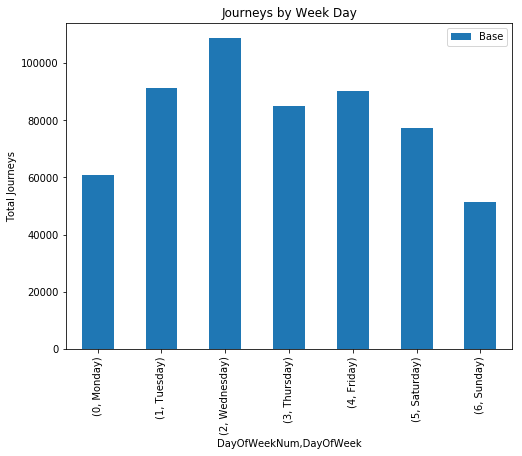

In [9]:
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],values='Base',aggfunc='count')

uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day')


Text(0.5, 1.0, 'Journeys by Hour')

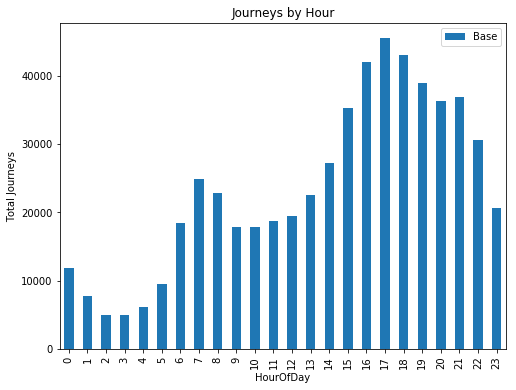

In [7]:
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour')


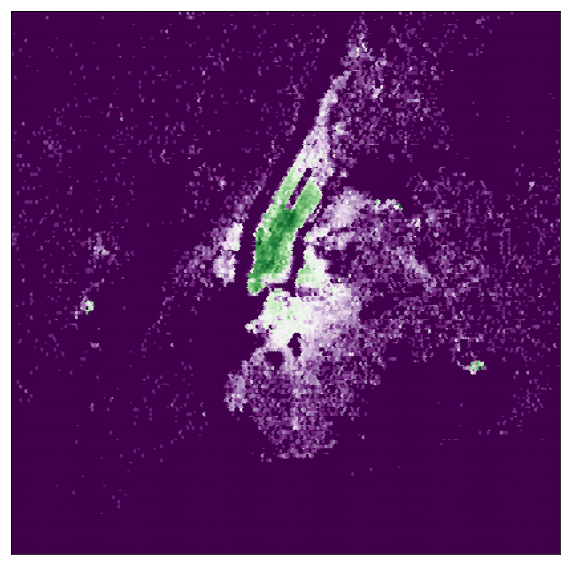

In [26]:
map = Basemap(projection='ortho', lat_0=0, lon_0=0)


west, south, east, north = -74.26, 40.50, -73.70, 40.92
#Most of the data of locations lies within the given ranges and Mercator projection as it is the most common

fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(111)

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='c')

x, y = m(uber_data['Lon'].values, uber_data['Lat'].values)

m.hexbin(x, y, gridsize=1000,bins='log', cmap='PRGn')


In [ ]:



map = Basemap(projection='ortho', lat_0=0, lon_0=0)

Resolution: resolution of boundary database to use. Can be c (crude), l (low), i(intermediate), h (high), f (full) or None

Lat_ts: latitude of true scale. Optional for stereographic, cylindrical equal area and mercator projections. default is lat_0 for stereographic projection. default is 0 for mercator and cylindrical equal area projections.

lat_0	central latitude (y-axis origin) - used by all projections.
lon_0	central meridian (x-axis origin) - used by all projections.
llcrnrlon	longitude of lower left hand corner of the selected map domain.
llcrnrlat	latitude of lower left hand corner of the selected map domain.
urcrnrlon	longitude of upper right hand corner of the selected map domain.
urcrnrlat	latitude of upper right hand corner of the selected map domain.

Either use lat_0 and lon_0 for defining the centre and plot the rest, or specify the boundary latitudes or longitudes.



Here im working  with Latitudes method.

west, south, east, north = -74.26, 40.50, -73.70, 40.92
#Most of the data of locations lies within the given ranges and Mercator projection as it is the most commonly used.

fig = plt.figure(figsize=(14,10))

ax = fig.add_subplot(111)

m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')

x, y = m(uber_data['Lon'].values, uber_data['Lat'].values)

m.hexbin(x, y, gridsize=1000,
         bins='log', cmap=PRGn);

bins : 'log' or int or sequence, optional, default is None
If None, no binning is applied; the color of each hexagon directly corresponds to its count value.
If 'log', use a logarithmic scale for the color map. Internally, log10(i+1) is used to determine the hexagon color.
If an integer, divide the counts in the specified number of bins, and color the hexagons accordingly.
If a sequence of values, the values of the lower bound of the bins to be used.



In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#the %matplotlib inline will make your plot outputs appear and be stored within the notebook.

DATA_FILE = 'input/uber-raw-data-aPR14.csv'
uber_data = pd.read_csv(DATA_FILE)
uber_data.head()
#Reading datafile and printing first 5 rows.
uber_data.info()
#prints columns of the datafile
uber_data['Date/Time'] = pd.to_datetime(uber_data['Date/Time'], format="%m/%d/%Y %H:%M:%S")

#Syntax:
pandas.to_datetime(arg,format=None)

Eg: 04-01-2014  00:11:00


uber_data['DayOfWeekNum'] = uber_data['Date/Time'].dt.dayofweek
#converts date to day. return the day of the week. It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.

uber_data['DayOfWeek'] = uber_data['Date/Time'].dt.weekday_name
#converts given date to weekday name

uber_data['MonthDayNum'] = uber_data['Date/Time'].dt.day
#extracts day from date and time

uber_data['HourOfDay'] = uber_data['Date/Time'].dt.hour
#extracts hour from date and time



#Plot graph finding number of journeys according to day
uber_weekdays = uber_data.pivot_table(index=['DayOfWeekNum','DayOfWeek'],
                                values='Base',
                                  aggfunc='count')
#saves company code in Values, counts entries according to day of week

uber_weekdays.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Week Day');


#Plot graph finding number of journeys according to hour
uber_hour = uber_data.pivot_table(index=['HourOfDay'],
                                  values='Base',
                                  aggfunc='count')
uber_hour.plot(kind='bar', figsize=(8,6))
plt.ylabel('Total Journeys')
plt.title('Journeys by Hour')

